# Softmax Function

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

2023-09-30 04:48:36.406573: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.2 when it was built against 1.14.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/tmp/ipykernel_3700/2597112955.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


### Function

$$ \large
a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }}
$$

In [2]:
def softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    return (sm)

### Example

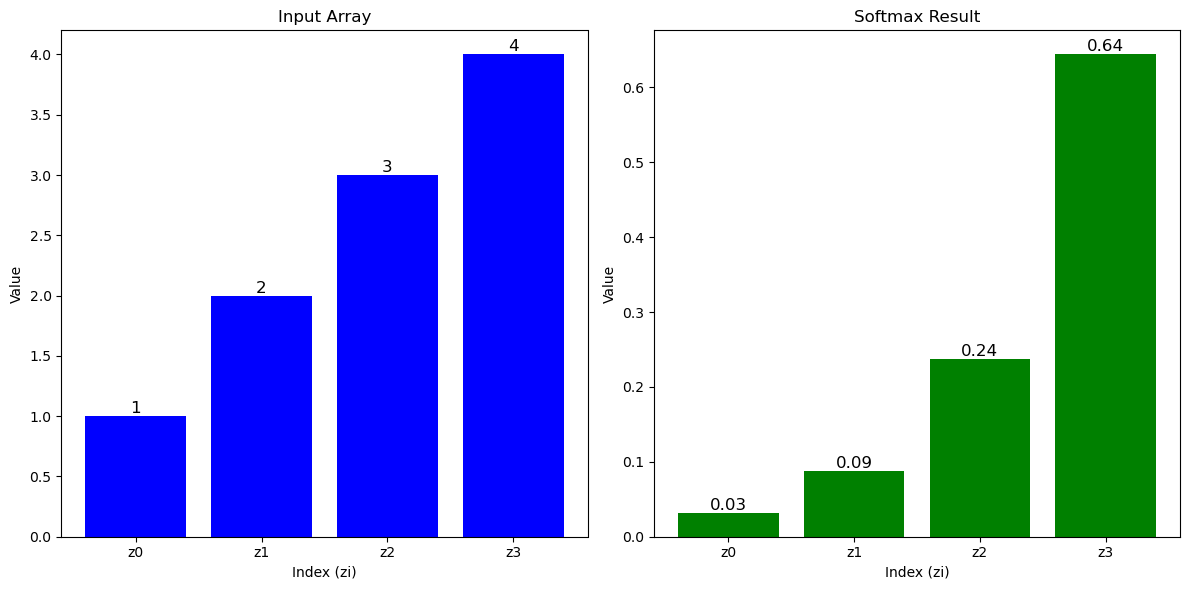

In [3]:
input_array = np.array([1, 2, 3, 4])
softmax_result = softmax(input_array)

custom_labels = ['z0', 'z1', 'z2', 'z3']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(np.arange(len(input_array)), input_array,
           tick_label=custom_labels, color='b')
axs[0].set_title('Input Array')
axs[0].set_xlabel('Index (zi)')
axs[0].set_ylabel('Value')
for i, v in enumerate(input_array):
    axs[0].text(i, v, str(v), ha='center', va='bottom', fontsize=12)

axs[1].bar(np.arange(len(softmax_result)), softmax_result,
           tick_label=custom_labels, color='g')
axs[1].set_title('Softmax Result')
axs[1].set_xlabel('Index (zi)')
axs[1].set_ylabel('Value')
for i, v in enumerate(softmax_result):
    axs[1].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Cost Function

$$
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases}
$$

$$
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right]
$$

In [4]:
def loss(x, y):
    a = softmax(x)
    epsilon = 1e-15  # Small constant to avoid taking log(0)
    return -math.log(a[y] + epsilon)

In [5]:
def cost_fxn(X, y):
    m = X.shape[0]
    cost = 0
    for i in range(m):
        cost += loss(X[i], y[i])

    cost = cost / m
    return cost

### Dataset

In [6]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(
    n_samples=2000, centers=centers, cluster_std=1.0, random_state=30)

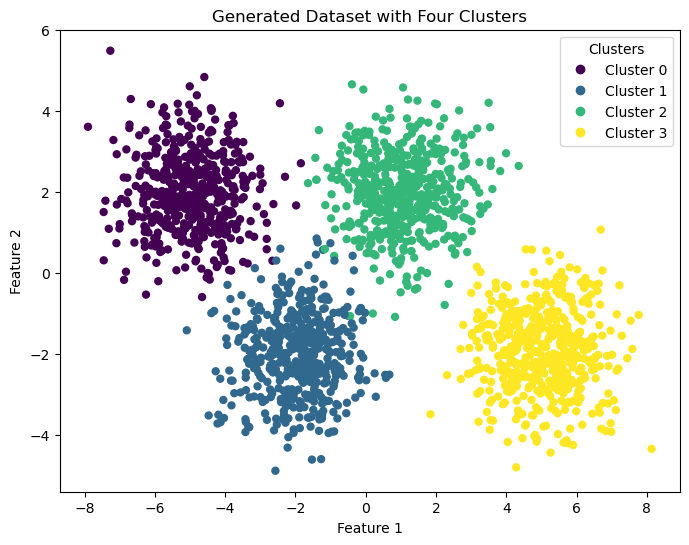

In [7]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1],
                      c=y_train, cmap='viridis', marker='o', s=25)

legend_labels = [f'Cluster {i}' for i in range(len(centers))]
plt.legend(handles=scatter.legend_elements()[
           0], labels=legend_labels, title="Clusters")

plt.title("Generated Dataset with Four Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

### Models

In [8]:
model1 = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='softmax')                  # <-- softmax activation here
    ]
)
model1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model1.fit(
    X_train, y_train,
    epochs=10
)

Epoch 1/10


2023-09-30 04:48:39.289677: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


63/63 [==============================] - 1s 4ms/step - loss: 1.2351
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.5540
Epoch 3/10
63/63 [==============================] - 0s 4ms/step - loss: 0.2483
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1359
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0922
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0723
Epoch 7/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0610
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0536
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0485
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0440


In [9]:
model2 = Sequential(
    [
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(4, activation='linear')                   # <-- Note
    ]
)
model2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True),                              # <-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model2.fit(
    X_train, y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 3ms/step - loss: 1.0235
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.4569
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1922
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1087
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0783
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 7/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0524
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0461
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0420
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0384


### Output

In [10]:
p_preferred = model1.predict(X_train)
data = []

for i in range(5):
    row = {
        'Prediction': p_preferred[i],
        'Category': np.argmax(p_preferred[i]),
        'Max': np.max(p_preferred[i]),
        'Min': np.min(p_preferred[i])
    }
    data.append(row)

df = pd.DataFrame(data)

print(df)

print("")

y_pred=np.argmax(p_preferred, axis=1)
correct_predictions = np.sum(y_pred == y_train)
total_predictions = len(y_train)
error_percentage = (1 - (correct_predictions / total_predictions)) * 100
print("Error percentage =", error_percentage, "%")

 1/63 [..............................] - ETA: 7s

63/63 [==============================] - 0s 3ms/step
                                                Prediction  Category  \
0  [0.013575505, 0.0058396775, 0.9595789, 0.021005856]      2          
1  [0.9927642, 0.0069660717, 0.00014787458, 0.00012183894]  0          
2  [0.9492882, 0.048417315, 0.0013393947, 0.0009550648]     0          
3  [0.0059124473, 0.9909657, 0.0021729309, 0.00094890903]   1          
4  [0.007648372, 0.00049299677, 0.9915193, 0.00033931725]   2          

        Max       Min  
0  0.959579  0.005840  
1  0.992764  0.000122  
2  0.949288  0.000955  
3  0.990966  0.000949  
4  0.991519  0.000339  

Error percentage = 1.1499999999999955 %


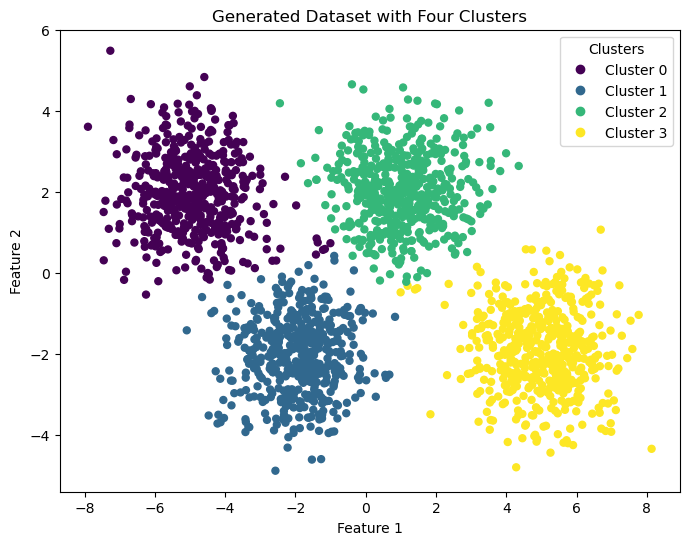

In [11]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1],
                      c=y_pred, cmap='viridis', marker='o', s=25)

legend_labels = [f'Cluster {i}' for i in range(len(centers))]
plt.legend(handles=scatter.legend_elements()[
           0], labels=legend_labels, title="Clusters")

plt.title("Generated Dataset with Four Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

In [12]:
p_preferred = model2.predict(X_train)
data = []

for i in range(5):
    row = {
        'Prediction': p_preferred[i],
        'Category': np.argmax(p_preferred[i]),
        'Max': np.max(p_preferred[i]),
        'Min': np.min(p_preferred[i])
    }
    data.append(row)

df = pd.DataFrame(data)

print(df)

print("")

y_pred=np.argmax(p_preferred, axis=1)
correct_predictions = np.sum(y_pred == y_train)
total_predictions = len(y_train)
error_percentage = (1 - (correct_predictions / total_predictions)) * 100
print("Error percentage =", error_percentage, "%")

63/63 [==============================] - 0s 2ms/step
                                        Prediction  Category       Max  \
0  [-3.5553045, -2.3215127, 2.7496367, -1.1224577]  2         2.749637   
1  [3.9082115, -1.585982, -3.236596, -4.151594]     0         3.908211   
2  [2.6619542, -0.6973758, -2.6322873, -3.6460242]  0         2.661954   
3  [-2.6093295, 3.19182, -2.3612943, -3.2686825]    1         3.191820   
4  [-1.4490111, -4.86571, 3.3345413, -4.152247]     2         3.334541   

        Min  
0 -3.555305  
1 -4.151594  
2 -3.646024  
3 -3.268682  
4 -4.865710  

Error percentage = 1.100000000000001 %
